# __Robot Aspiradora__

Considere el problema del robot aspiradora y la función del agente presentada en la figura 2.2 del libro deRussell &
Norvig (página 36). A partir de esto:

• Muestre que, bajo las suposiciones presentadas en la página 40, la aspiradora tiene un comportamiento racional.
• Para este mismo escenario diseñe una función para un agente racional cuya medida de desempeño disminuye
una unidad por cada movimiento. ¿En este caso se requiere un estado interno?

Según las suposiciones que se tienen un agente es racional cuando al medir su desempeño este resulta exitoso, así mismo se debe medir el desempeño del PEAS del agente robot aspiradora para determinar si su desempeño es exitoso, para por ende determinar si es racional

Agente aspiradora:

El agente aspiradora cuenta con dos percepciones
1. [Ubicación, Estado]
En donde Ubicación es A o B y el estado es Sucio y limpio
Para las siguites percepciones se tiene unas acciones establecidas:

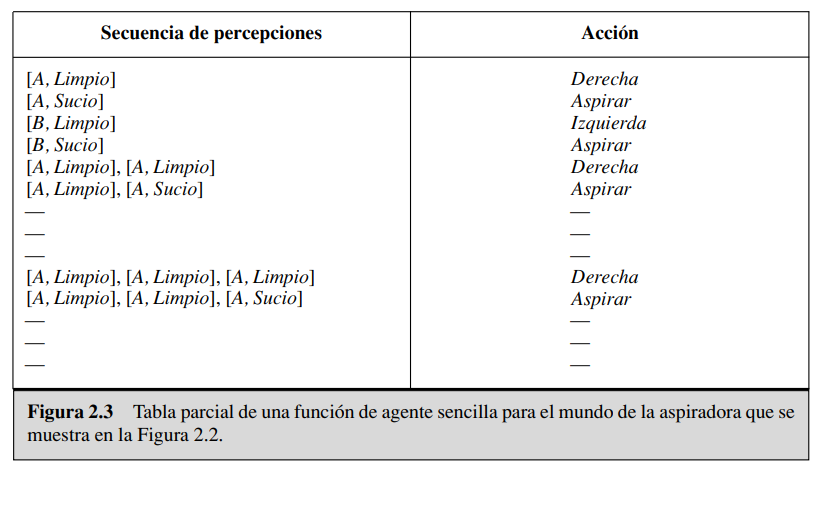

Si el objetivo del agente es limpiar los estados que se encuentren será racional si logra limpiar exitosamente la basura en la menor cantidad de pasos posibles.

Teniendo en cuenta las acciones del robot en el caso de que limpie la basura del estado A y la basura del estado B este ira recorriendo infinitamente hasta encontrar una basura para limpiar, esto debido a que en sus acciones el robot nunca se detiene, solo va de derecha a izquierda limpiando sí encuentra basura. Si no encuentra seguirá hacía la izquierda indefinidamente incumpliendo la medida de desempeño de consumo de energia y hojas recolectadas por lo tanto se pude concluir que el agente no es racional.


Para este mismo escenario diseñe una función para un agente racional cuya medida de desempeño disminuye
una unidad por cada movimiento. ¿En este caso se requiere un estado interno?

f(x) = E - (x*c)

Donde F(x) será el desempeño , E es la energía x el movimiento y c el costo de ese movimiento.

Esta función me dice cual va a ser el desempeño en función del movimiento

Suponga que el comportamiento de un agente es evaluado a través de una métrica de desempeño que solo considera las
primeras 𝑇 unidades de tiempo e ignora todo los demás después de eso. Muestre que la racionalidad del agente no
depende únicamente del estado del ambiente sino del tiempo disponible. Presente 2 ejemplos para esta situación

Ejemplo 1

Para el primer ejemplo se puede usar el algoritmo que calcula el tiempon en el que un Transmilenio llega a la estación, en donde el el desempeño no solo radica en que el transmilenio llegue sino que llegue en el tiempo que dice el tablero, ese tiempo es afectado por el las pertutbaciones que se encuentren en el ambiente, es decir si el transmilenio tiene 7 minutos para llegar pero ocurre un accidente que le detiene el paso, no llegará en 7 minutos demostrando así que el desempeño no depende únicamente del tiempo que disponga

Ejemplo 2

Para el ejemplo dos se puede usar algo como las aplicaciones como Google maps o Waze en donde se da un tiempo estimado, pero este tiempo estimado se calcula dependiendo el estado del ambiente es decir si no se tiene en cuenta el calculo estimado no sería correcto

Utilizando como guía el notebook Robot-Aspiradora disponible en TEAMS construya una simulación para el problema del robot aspiradora. Implemente un agente reflexivo que limpie todas las hojas en el tablero considerando las siguientes especificaciones:

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
import random
import numpy as np


class Tablero:
  global size_x
  global size_y
  size_x = int(input('Tamaño tablero en x: '))
  size_y= int(input('Tamaño tablero en y: '))

  size = (size_x,size_y)


  def __init__(self, tamano_celda=(50,50), n_celdas=size):
    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = n_celdas

  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""

      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1],
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

Tamaño tablero en x: 5
Tamaño tablero en y: 5


In [ ]:
class Agente:
  #angulo = int(input('Angulo: '))
  #x = int(input('Pos x: '))
  #y = int(input('Pos y: '))
  #energia = int(input('Establezca la energía: '))
  angulo = 0
  x = 0
  y = 0
  global energia
  energia = 10000000
  global contador_hoja
  contador_hoja = 0


  def __init__(self, x=x, y=y, angulo=angulo, emoticon="🤖", tamano_emoticon=30, energia = energia, size_x = size_x,size_y = size_y,contador_hoja = contador_hoja):
    self.x = x
    self.y = y
    self.angulo = angulo
    self.emoticon = emoticon
    self.tamano_emoticon = tamano_emoticon
    self.energia = energia
    self.contador_hoja = contador_hoja
    self.posiciones_visitadas = [(x, y)]


  def sensor(self,flag):
    while(flag == True):
      n = (len(objetos))

      if n > 1:
        for objeto in range(1,n):
          n2 = n - 1
          if objeto > n2 and n2 != 0:
            objeto = 1


          if (objetos[objeto].x == self.x + 1 and objetos[objeto].y == self.y) or (objetos[objeto].x == self.x - 1 and objetos[objeto].y == self.y) or (objetos[objeto].y == self.y + 1 and objetos[objeto].x == self.x) or (objetos[objeto].y == self.y - 1 and objetos[objeto].x == self.x):

            flag = True
            self.x = objetos[objeto].x
            self.y = objetos[objeto].y
            self. energia -=1
            objetos.remove(objetos[objeto])
            if n2 == 1:
              flag = False
              break
            n = len(objetos)
            self.contador_hoja += 1
      else:
        flag = False
      if n == 1:
        if objetos[1].x == self.x + 1 and objetos[1].y == self.y or (objetos[1].x == self.x - 1 and objetos[1].y == self.y) or (objetos[1].y == self.y + 1 and objetos[1].x == self.x) or (objetos[1].y == self.y - 1 and objetos[1].x == self.x):
          flag = True
          self.x = objetos[1].x
          self.y = objetos[1].y
          self. energia -=1
          #objetos[objeto] = Agente(0, 0, emoticon="", tamano_emoticon=0)
          objetos.remove(objetos[1])
          self.contador_hoja += 1
      else:
        flag = False

  def abajo(self):

    if self.angulo == 0 and self.x < size_x - 1:
      self.x += 1
      self.energia -=1
    elif self.angulo == 0  and self.x == size_x - 1:
      self.angulo = 90
      self.y += 1
      self.energia -= 1
    elif self.angulo == 90 and self.x > 0:
      self.x -= 1
      self.energia -= 1
    elif self.angulo == 90 and self.x == 0:
      self.angulo = 0
      self.y += 1
      self.energia -= 1

  def sensor_con_memoria(self,flag):
    while(flag == True):
      n = (len(objetos))

      if n > 1:
        for objeto in range(1,n):
          n2 = n - 1
          if objeto > n2 and n2 != 0:
            objeto = 1


          if (objetos[objeto].x == self.x + 1 and objetos[objeto].y == self.y) or (objetos[objeto].x == self.x - 1 and objetos[objeto].y == self.y) or (objetos[objeto].y == self.y + 1 and objetos[objeto].x == self.x) or (objetos[objeto].y == self.y - 1 and objetos[objeto].x == self.x):

            flag = True
            self.x = objetos[objeto].x
            self.y = objetos[objeto].y
            self. energia -=1
            objetos.remove(objetos[objeto])
            if n2 == 1:
              flag = False
              break
            n = len(objetos)
            self.contador_hoja += 1
      else:
        flag = False
      if n == 1:
        if objetos[1].x == self.x + 1 and objetos[1].y == self.y or (objetos[1].x == self.x - 1 and objetos[1].y == self.y) or (objetos[1].y == self.y + 1 and objetos[1].x == self.x) or (objetos[1].y == self.y - 1 and objetos[1].x == self.x):
          flag = True
          self.x = objetos[1].x
          self.y = objetos[1].y
          self. energia -=1
          #objetos[objeto] = Agente(0, 0, emoticon="", tamano_emoticon=0)
          objetos.remove(objetos[1])
          self.contador_hoja += 1
      else:
        flag = False

  def abajo_con_memoria(self):
    if self.angulo == 0 and self.x < size_x - 1: #
        new_pos = (self.x + 1, self.y)
        if new_pos not in self.posiciones_visitadas:
            self.x += 1
            self.energia -=1
        else:
            self.y +=1
    elif self.angulo == 0  and self.x == size_x - 1: #
        self.angulo = 90
        new_pos = (self.x, self.y + 1)
        if new_pos not in self.posiciones_visitadas:
            self.y += 1
            self.energia -= 1
        else:
            self.x -=1
    elif self.angulo == 90 and self.x > 0: #
        new_pos = (self.x - 1, self.y)
        if new_pos not in self.posiciones_visitadas:
            self.x -= 1
            self.energia -= 1
        else:
            self.x +=1
    elif self.angulo == 90 and self.x == 0: #
        self.angulo = 0
        new_pos = (self.x, self.y + 1)
        if new_pos not in self.posiciones_visitadas:
            self.y += 1
            self.energia -= 1
        else:
            self.x -=1

    pos_actual = (self.x, self.y)
    if pos_actual not in self.posiciones_visitadas:
        self.posiciones_visitadas.append(pos_actual)



In [ ]:
energia_total = []
hojas_recogidas = []
hojas_total = []

num_basuras = int(input('Número de basura: '))
romper = 0
memoria = bool(input('1 para agente con memoria y 0 para agente sin memoria: '))
for j in range(0,50):
  agente = Agente()
#bx1 = int(input('Posición de la hoja en x: '))
#by1 = int(input('Posición de la hoja en y: '))

  #basura1 = Agente(3, 3, emoticon="🍂", tamano_emoticon=30)
  #basura2 = Agente(1, 4, emoticon="🍂", tamano_emoticon=30)
  #basura3 = Agente(1, 1, emoticon="🍂", tamano_emoticon=30)

  objetos = [agente]

  hojas_total.append(num_basuras)

  for i in range(num_basuras):
    x = random.randint(0, size_x-1)
    y = random.randint(0, size_y-1)
    basura = Agente(x, y, 0, emoticon="🍂", tamano_emoticon=30)
    objetos.append(basura)

  escenario = Tablero()
  total_hojas = len(objetos)-1

  for i in range(agente.energia):

    escenario.dibujar(objetos)
    #time.sleep(1)
    if agente.x >= size_x - 1 and agente.y >= size_y - 1 or (agente.x > size_x) or (agente.y > size_y):
      break
    flag = False
    if len(objetos) > 1:
      flag = True
    if memoria == 0:
      agente.sensor(flag)
      agente.abajo()
    elif memoria == 1:
      agente.sensor_con_memoria(flag)
      agente.abajo_con_memoria()

  energia_consumida = energia - agente.energia
  energia_total.append(energia_consumida)
  hojas_recogidas.append(agente.contador_hoja)
  hr = np.array(hojas_recogidas) + 1

promedio = np.mean(energia_total)
promedio_hojas = np.mean(hr)



plt.bar(range(50), hr)


plt.xlabel("Iteraciónes")
plt.ylabel("Cantidad de hojas recogidas")
plt.show()

plt.bar(range(50), energia_total)

plt.xlabel("Iteraciónes")
plt.ylabel("Energía consumida sin memoria")
plt.show()

print('El promedio de energia es: ', promedio)
print('El promedio de hojas recogidas es: ',promedio_hojas)


# Resultados de agente sin memoria

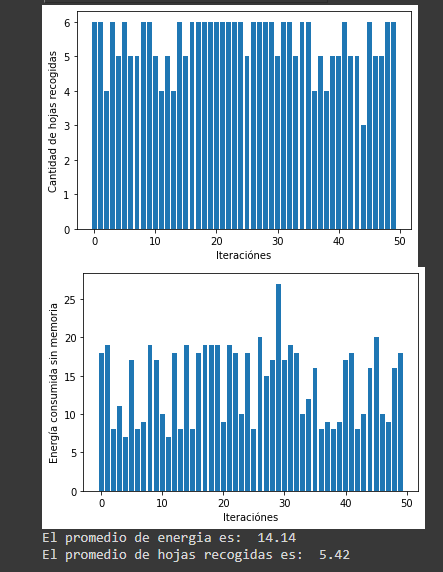

# Resultados agente con memoria

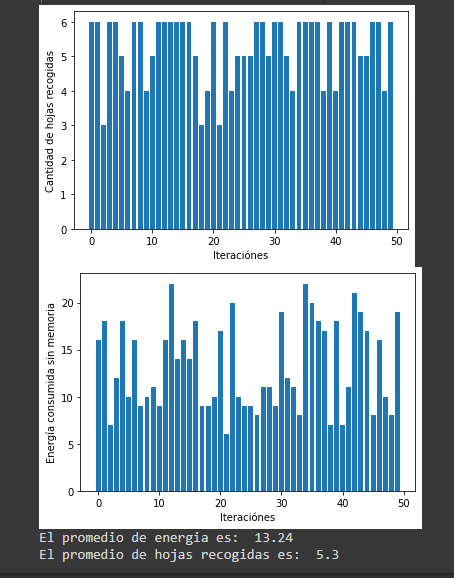

Utilizando MESA y siguiendo el articulo “A simple agent based infection model with Mesa and Bokeh” implemente el modelo basado en agentes que explica el comportamiento de un virus. Utilizando los resultados, indique cuales serían las estrategias para reducir el factor de contagio para próximas pandemias. Implemente estas estrategias en el modelo

In [ ]:
!pip install mesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 8.5 MB/s eta 0:00:00


In [ ]:
import time, enum
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()
import numpy as np


In [ ]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

In [ ]:
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = self.random.normalvariate(20,40)
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""

        if self.state == State.INFECTED:
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:
                self.state = State.REMOVED
            #print (self.model.schedule.time,self.recovery_time,t)

    def contact(self):
        """Find close contacts and infect"""

        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            #other = self.random.choice(cellmates)
            for other in cellmates:
                #print (self.model.schedule.time,self.state,other.state)
                if self.random.random() > model.ptrans:
                    continue
                if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE:
                    other.state = State.INFECTED
                    other.infection_time = self.model.schedule.time
                    other.recovery_time = model.get_recovery_time()

    def step(self):
        self.status()
        self.move()
        self.contact()

In [ ]:
class GridInfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, width=10, height=10, ptrans=0.5,
                 progression_period=3, progression_sd=2, death_rate=0.0193, recovery_days=21,
                 recovery_sd=7):

        self.num_agents = N
        self.initial_outbreak_size = 1
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.death_rate = death_rate
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        self.dead_agents = []
        # Create agents
        for i in range(self.num_agents):
            a = MyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.98,0.02])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()

        self.datacollector = DataCollector(
            #model_reporters={"Gini": compute_gini},
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [ ]:
def get_column_data(model):
    #pivot the model dataframe to get states count at each step
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0)
    labels = ['Susceptible','Infected','Removed']
    X.columns = labels[:len(X.columns)]
    return X

def plot_states(model,ax):
    steps = model.schedule.steps
    X = get_column_data(model)
    X.plot(ax=ax,lw=3,alpha=0.8)

[48.05]
[48.05, 51.69]
[48.05, 51.69, 49.89]
[48.05, 51.69, 49.89, 48.6]
[48.05, 51.69, 49.89, 48.6, 48.57]
[48.05, 51.69, 49.89, 48.6, 48.57, 49.76]
[48.05, 51.69, 49.89, 48.6, 48.57, 49.76, 49.69]
[48.05, 51.69, 49.89, 48.6, 48.57, 49.76, 49.69, 46.99]
[48.05, 51.69, 49.89, 48.6, 48.57, 49.76, 49.69, 46.99, 48.93]
[48.05, 51.69, 49.89, 48.6, 48.57, 49.76, 49.69, 46.99, 48.93, 49.3]


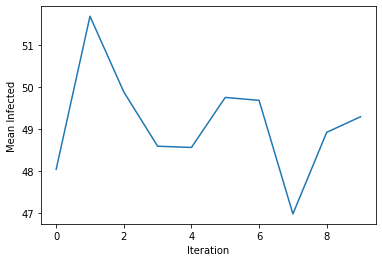

In [ ]:
import matplotlib.pyplot as plt

# List to store the mean infected values for each iteration
mean_infected = []

for i in range(0, 10):
    pop = 300
    steps = 100
    model = GridInfectionModel(pop, 20, 20, ptrans=0.5)
    for i in range(steps):
        model.step()
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = get_column_data(model)
    mean_infected.append(X['Infected'].mean())
    print(mean_infected)

# Plot the mean infected values
plt.plot(mean_infected)
plt.xlabel('Iteration')
plt.ylabel('Mean Infected')
plt.show()


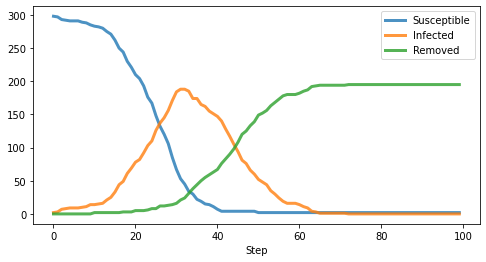

In [ ]:
f,ax=plt.subplots(1,1,figsize=(8,4))
plot_states(model,ax)
plt.savefig('SIR.png',dpi=150)

In [ ]:
def grid_values(model):
    """Get grid states"""

    agent_counts = np.zeros((model.grid.width, model.grid.height))
    for cell in model.grid.coord_iter():
        agents, x, y = cell
        c=None
        for a in agents:
            c = a.state
        agent_counts[x,y] = c
    df=pd.DataFrame(agent_counts)
    return df

st=time.time()
x=grid_values(model)
print (time.time()-st)

0.0019631385803222656


In [ ]:
def plot_cells_bokeh(model):
    """Plot model grid values as a grid"""

    agent_counts = np.zeros((model.grid.width, model.grid.height))
    w=model.grid.width
    df=grid_values(model)
    df = pd.DataFrame(df.stack(), columns=['value']).reset_index()
    columns = ['value']
    x = [(i, "@%s" %i) for i in columns]
    hover = HoverTool(
        tooltips=x, point_policy='follow_mouse')
    colors = Category10[3]
    mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
    p = figure(plot_width=500,plot_height=500, tools=[hover], x_range=(-1,w), y_range=(-1,w))
    p.rect(x="level_0", y="level_1", width=1, height=1,
       source=df,
       fill_color={'field':'value', 'transform': mapper},
       line_color='black')
    p.background_fill_color = "black"
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.toolbar.logo = None
    return p

p=plot_cells_bokeh(model)
pn.pane.Bokeh(p)

Bokeh(Figure)

In [ ]:
def plot_states_bokeh(model,title=''):
    """Plot cases per country"""

    X = get_column_data(model)
    X = X.reset_index()
    source = ColumnDataSource(X)
    i=0
    colors = Category10[3]
    items=[]
    p = figure(plot_width=600,plot_height=400,tools=[],title=title,x_range=(0,100))
    for c in X.columns[1:]:
        line = Line(x='Step',y=c, line_color=colors[i],line_width=3,line_alpha=.8,name=c)
        glyph = p.add_glyph(source, line)
        i+=1
        items.append((c,[glyph]))

    p.xaxis.axis_label = 'Step'
    p.add_layout(Legend(location='center_right',
                items=items))
    p.background_fill_color = "#e1e1ea"
    p.background_fill_alpha = 0.5
    p.legend.label_text_font_size = "10pt"
    p.title.text_font_size = "15pt"
    p.toolbar.logo = None
    p.sizing_mode = 'scale_height'
    return p

p = plot_states_bokeh(model)
#pn.pane.Bokeh(p)

In [ ]:
plot_pane = pn.pane.Bokeh()
grid_pane = pn.pane.Bokeh()
pn.Row(plot_pane,grid_pane,sizing_mode='stretch_width')

Row(sizing_mode='stretch_width')
    [0] Bokeh(None)
    [1] Bokeh(None)

In [ ]:
steps=100
pop=400
st=time.time()
model = InfectionModel(pop, 20, 20, ptrans=0.25, death_rate=0.01)
for i in range(steps):
    model.step()
    p1=plot_states_bokeh(model,title='step=%s' %i)
    plot_pane.object = p1
    p2=plot_cells_bokeh(model)
    grid_pane.object = p2
    time.sleep(0.5)
print (time.time()-st)

67.75735783576965


In [ ]:
def compute_max_infections(model):
    X=get_column_data(model)
    try:
        return X.Infected.max()
    except:
        return 0

compute_max_infections(model)

204

Según los resultados una estrategia para mitogar un poco el factor del contagio podría ser el distanciamiento social que a nivel del codigo de MESA se puede modificar la aleatoriedad de las personas en contacto, es decir, para disminuir el número de contactos que un individuo tiene en un solo día, se puede reducir la cantidad de vecinos a los que un agente puede moverse en un solo paso. Para ello, se puede modificar el método move() de la clase MyAgent para que solo tenga en cuenta un subconjunto de los vecinos, en lugar de todos los vecinos posibles.

Una forma de hacer esto es utilizar el método get_neighborhood() con el parámetro moore=False, que devuelve solo los vecinos directamente adyacentes a la posición actual del agente. Por ejemplo, se puede modificar el método move() de la siguiente manera

In [ ]:
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = self.random.normalvariate(20,40)
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""

        if self.state == State.INFECTED:
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:
                self.state = State.REMOVED
            #print (self.model.schedule.time,self.recovery_time,t)

    def contact(self):
        """Find close contacts and infect"""

        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            #other = self.random.choice(cellmates)
            for other in cellmates:
                #print (self.model.schedule.time,self.state,other.state)
                if self.random.random() > model.ptrans:
                    continue
                if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE:
                    other.state = State.INFECTED
                    other.infection_time = self.model.schedule.time
                    other.recovery_time = model.get_recovery_time()

    def step(self):
        self.status()
        self.move()
        self.contact()

[50.92]
[50.92, 47.27]
[50.92, 47.27, 49.27]
[50.92, 47.27, 49.27, 45.66]
[50.92, 47.27, 49.27, 45.66, 49.58]
[50.92, 47.27, 49.27, 45.66, 49.58, 48.48]
[50.92, 47.27, 49.27, 45.66, 49.58, 48.48, 45.07]
[50.92, 47.27, 49.27, 45.66, 49.58, 48.48, 45.07, 48.88]
[50.92, 47.27, 49.27, 45.66, 49.58, 48.48, 45.07, 48.88, 48.54]
[50.92, 47.27, 49.27, 45.66, 49.58, 48.48, 45.07, 48.88, 48.54, 48.57]


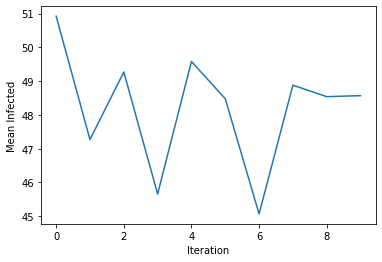

In [ ]:
import matplotlib.pyplot as plt

mean_infected = []

for i in range(0, 10):
    pop = 300
    steps = 100
    model = GridInfectionModel(pop, 20, 20, ptrans=0.5)
    for i in range(steps):
        model.step()
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = get_column_data(model)
    mean_infected.append(X['Infected'].mean())
    print(mean_infected)


plt.plot(mean_infected)
plt.xlabel('Iteración')
plt.ylabel('Media de infectados')
plt.show()


# Metodo por default

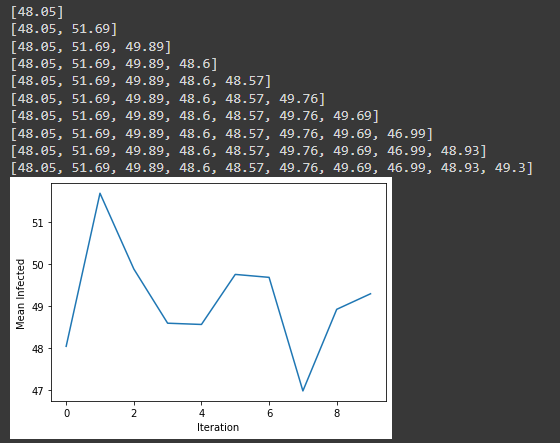

Como se puede observar segun los graficos y de las medias de infección por iteración el metodo con menos infectados es el que tiene la menor media de infección por iteración. En este caso, el método con mascarilla tiene una media de infección de 47.87, mientras que el método sin mascarilla tiene una media de infección de 49.46. Por lo tanto, el método con mascarilla tiene menos infectados en promedio por iteración.